In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unseen-images/new tomato images/file (2).jpg
/kaggle/input/unseen-images/new tomato images/1-29.png
/kaggle/input/tomato-leafdisease/tomato/rename.py
/kaggle/input/tomato-leafdisease/tomato/val/Tomato___Late_blight/0db85707-41f9-42df-ba3b-842d14f00a68___GHLB2 Leaf 8909.JPG
/kaggle/input/tomato-leafdisease/tomato/val/Tomato___Late_blight/0fca6d09-1931-4767-a195-1dd2b7cd10b7___GHLB Leaf 8 Day 12.JPG
/kaggle/input/tomato-leafdisease/tomato/val/Tomato___Late_blight/Tomato___Late_blight_original_0ba7d3d8-5c4c-4365-ba0c-69f61e96a36e___RS_Late.B 5312.JPG_0c8b3e88-9afa-41e1-a767-122ad7b27ac2.JPG
/kaggle/input/tomato-leafdisease/tomato/val/Tomato___Late_blight/1b212ad6-e65a-4467-bfd1-9f9139070d33___GHLB2 Leaf 8609.JPG
/kaggle/input/tomato-leafdisease/tomato/val/Tomato___Late_blight/1d6d043a-9df9-49ec-9b0f-e40a8e7f409f___RS_Late.B 5287.JPG
/kaggle/input/tomato-leafdisease/tomato/val/Tomato___Late_blight/1d83eef4-92a0-42a2-9ea7-1ec2e683dbc0___GHLB2 Leaf 8809.JPG
/kaggle/input/tomato

Importing Libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import cv2
import tensorflow as tf

# Define dataset paths (adjust paths as needed for Kaggle environment)
train_dir = '/kaggle/input/tomato-leafdisease/tomato/train'
val_dir = '/kaggle/input/tomato-leafdisease/tomato/val'

# Verify the data structure
print(f"Train data folders: {os.listdir(train_dir)}")
print(f"Validation data folders: {os.listdir(val_dir)}")


Train data folders: ['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']
Validation data folders: ['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


Data Preprocessing

In [3]:
# Define image augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print class indices for reference
print("Class Labels:", train_generator.class_indices)


Found 9998 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Class Labels: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


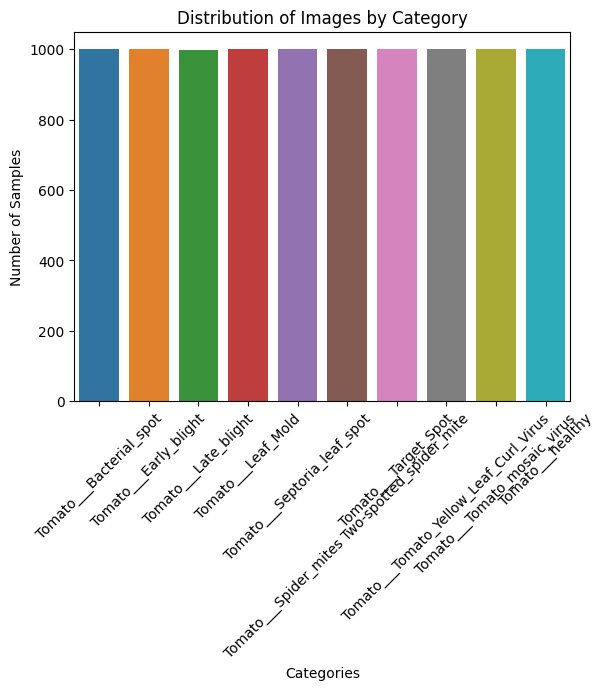

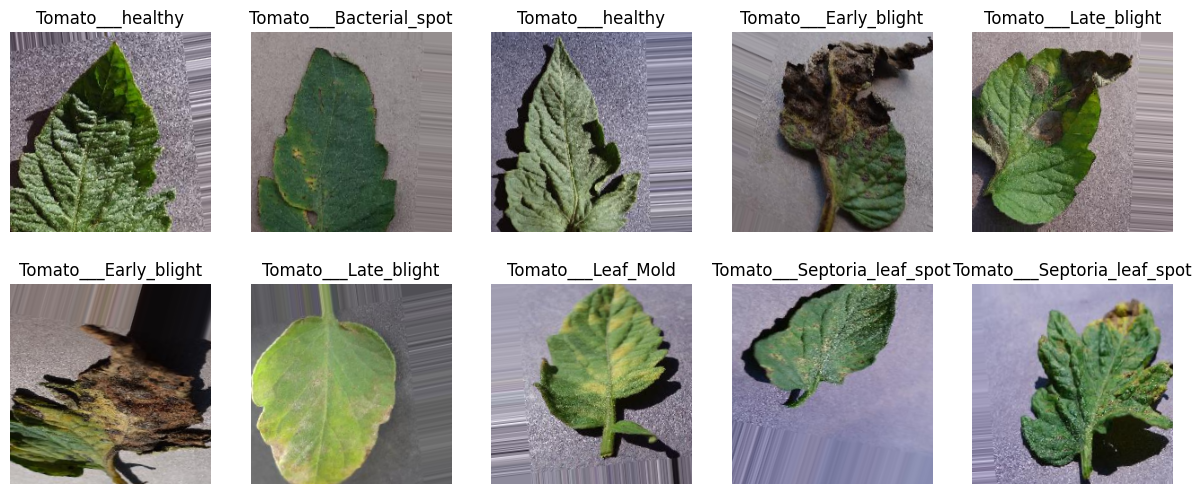

In [4]:
# Import necessary libraries
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# After setting up train_generator, use the class indices to visualize

# Map the class indices back to the original class labels for counting
categories = {v: k for k, v in train_generator.class_indices.items()}
original_labels = [categories[label] for label in train_generator.classes]

# Count the occurrences of each class label
label_counts = Counter(original_labels)

# Prepare data for countplot
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Plot distribution of samples per class
sns.barplot(x=labels, y=counts)
plt.title('Distribution of Images by Category')
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Number of Samples')
plt.show()

# Display a sample of images from the training data
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):  # Display the first 10 images
    img, label = train_generator[i // train_generator.batch_size]  # Get a batch
    ax[i // 5, i % 5].imshow(img[i % train_generator.batch_size])
    ax[i // 5, i % 5].set_title(categories[np.argmax(label[i % train_generator.batch_size])])
    ax[i // 5, i % 5].axis('off')
plt.show()


Data Visualization

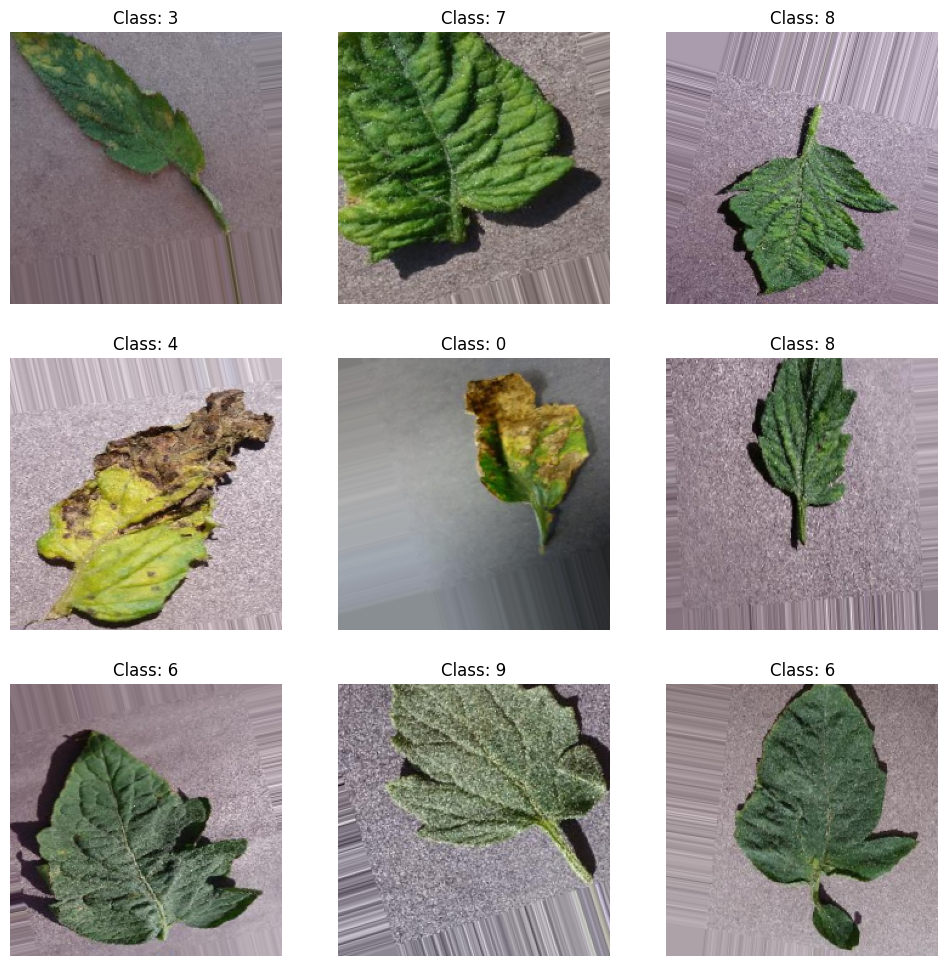

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


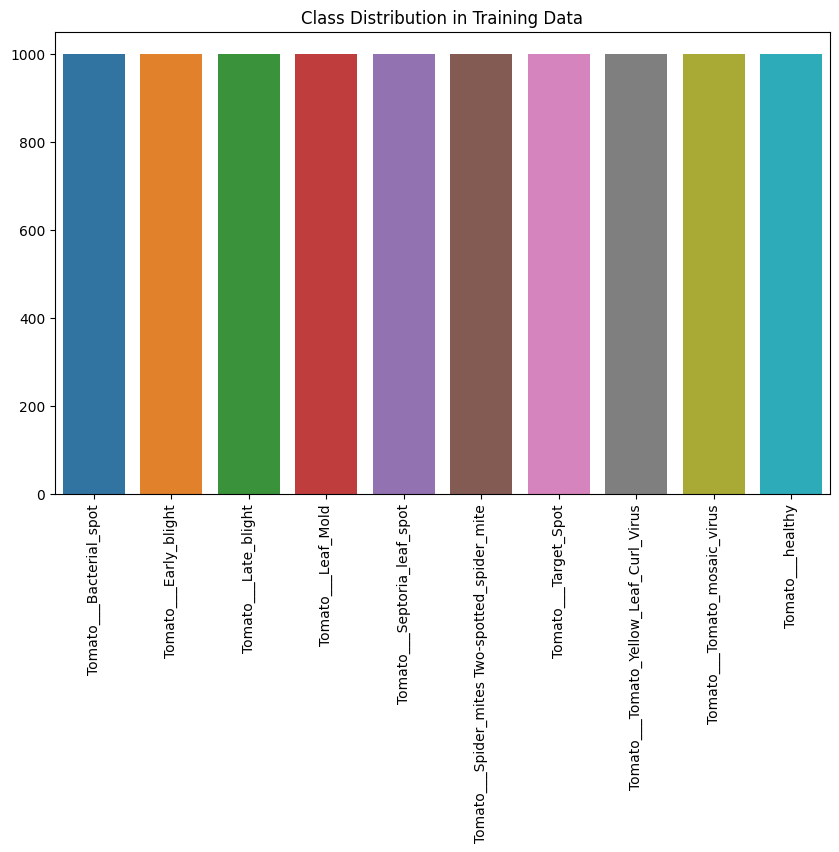

In [5]:
# Visualize a few training images and their labels
plt.figure(figsize=(12, 12))
for i in range(9):
    img, label = next(train_generator)  # Use next() to get the next batch of images and labels
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])  # Show the first image from the batch
    plt.title(f"Class: {np.argmax(label[0])}")  # Display the class index
    plt.axis('off')
plt.show()

# Class distribution
labels = list(train_generator.class_indices.keys())
class_counts = [len(os.listdir(os.path.join(train_dir, label))) for label in labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=class_counts)
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Data")
plt.show()


Machine Learning models

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define function to extract features for ML models with sampling
def extract_features(generator, num_samples):
    features = []
    labels = []
    total_batches = num_samples // generator.batch_size
    for _ in range(total_batches):
        img, label = next(generator)
        features.append(img.reshape(img.shape[0], -1))  # Flatten images
        labels.extend(np.argmax(label, axis=1))
    return np.concatenate(features), np.array(labels)

# Use a smaller number of samples for quicker testing
train_features, train_labels = extract_features(train_generator, 5000)  # Reduced sample size
val_features, val_labels = extract_features(val_generator, 500)  # Reduced sample size

# Define and train each ML model with fewer PCA components
models = {
    "SVM": make_pipeline(PCA(n_components=20), SVC(kernel='linear')),
    "Random Forest": RandomForestClassifier(n_estimators=50),  # Reduced estimators
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(train_features, train_labels)
    val_pred = model.predict(val_features)
    print(f"{model_name} Classification Report:")
    print(classification_report(val_labels, val_pred))
    print("Accuracy:", accuracy_score(val_labels, val_pred))
    print("=" * 50)


Training SVM...
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58        51
           1       0.35      0.30      0.32        50
           2       0.29      0.10      0.14        42
           3       0.30      0.30      0.30        47
           4       0.33      0.59      0.43        54
           5       0.29      0.28      0.29        50
           6       0.47      0.53      0.49        40
           7       0.50      0.68      0.58        47
           8       0.55      0.26      0.35        46
           9       0.64      0.51      0.57        53

    accuracy                           0.42       480
   macro avg       0.43      0.42      0.40       480
weighted avg       0.43      0.42      0.41       480

Accuracy: 0.42291666666666666
Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        51
           1       0.30      0.24      0.27        50
           2       0.50      0.31      0.38        42
           3       0.32      0.49      0.39        47
           4       0.33      0.52      0.40        54
           5       0.38      0.50      0.43        50
           6       0.42      0.25      0.31        40
           7       0.67      0.62      0.64        47
           8       0.63      0.72      0.67        46
           9       0.70      0.26      0.38        53

    accuracy                           0.45       480
   macro avg       0.48      0.44      0.44       480
weighted avg       0.48      0.45      0.44       480

Accuracy: 0.44583333333333336


CNN model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731440009.414036      85 service.cc:145] XLA service 0x781e500066b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731440009.414104      85 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/313 ━━━━━━━━━━━━━━━━━━━━ 53:03 10s/step - accuracy: 0.1250 - loss: 2.3024

I0000 00:00:1731440014.869232      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 422ms/step - accuracy: 0.2310 - loss: 2.1539 - val_accuracy: 0.3333 - val_loss: 2.2417
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 351ms/step - accuracy: 0.5420 - loss: 1.2851 - val_accuracy: 0.4725 - val_loss: 1.8481
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 353ms/step - accuracy: 0.6575 - loss: 0.9871 - val_accuracy: 0.6707 - val_loss: 1.0330
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 351ms/step - accuracy: 0.6989 - loss: 0.8741 - val_accuracy: 0.7197 - val_loss: 0.8333
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 350ms/step - accuracy: 0.7361 - loss: 0.7440 - val_accuracy: 0.7307 - val_loss: 0.8852
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 349ms/step - accuracy: 0.7491 - loss: 0.6925 - val_accuracy: 0.6056 - val_loss: 1.8341
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 112s 351ms/step - accuracy: 0.7718 - loss: 0.6612 - val_accuracy: 0.7007 - val_loss: 0.9929
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 352ms/step - accuracy: 0.7803 - loss: 0.64

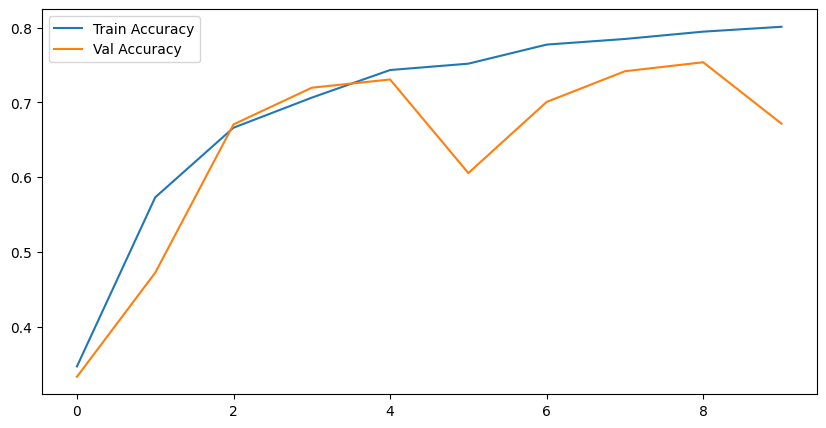

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a simple CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
cnn_history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


VGG16 model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 131s 379ms/step - accuracy: 0.2762 - loss: 2.0423 - val_accuracy: 0.6366 - val_loss: 1.2367
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 361ms/step - accuracy: 0.5381 - loss: 1.3986 - val_accuracy: 0.6877 - val_loss: 0.9503
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 356ms/step - accuracy: 0.6051 - loss: 1.1986 - val_accuracy: 0.7147 - val_loss: 0.8804
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 352ms/step - accuracy: 0.6396 - loss: 1.0902 - val_accuracy: 0.7247 - val_loss: 0.8162
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 355ms/step - accuracy: 0.6566 - loss: 1.0328 - val_accuracy: 0.7528 - val_loss: 0.7297
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 355ms/step - accuracy: 0.6810 - loss: 0.9621 - val_accuracy: 0.7678 - val_loss: 0.6829
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 351ms/step - accuracy: 0.7079 - loss: 0.8905 - val_accuracy: 0.7888 - val_loss: 0.6488
Epoch 8/10
313/313 ━━━━━━

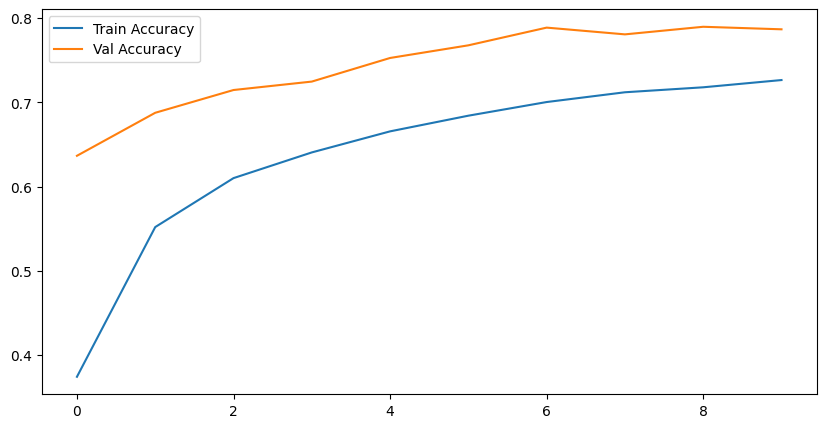

In [8]:
from tensorflow.keras.applications import VGG16

# Using VGG16 as a different option
vgg_model = Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Freeze base model layers
vgg_model.layers[0].trainable = False

# Compile model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train model
vgg_history = vgg_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(vgg_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


Evaluating the accuracy of VGG model

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8024 - loss: 0.6048
Validation Accuracy for VGG Model: 0.7867867946624756
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


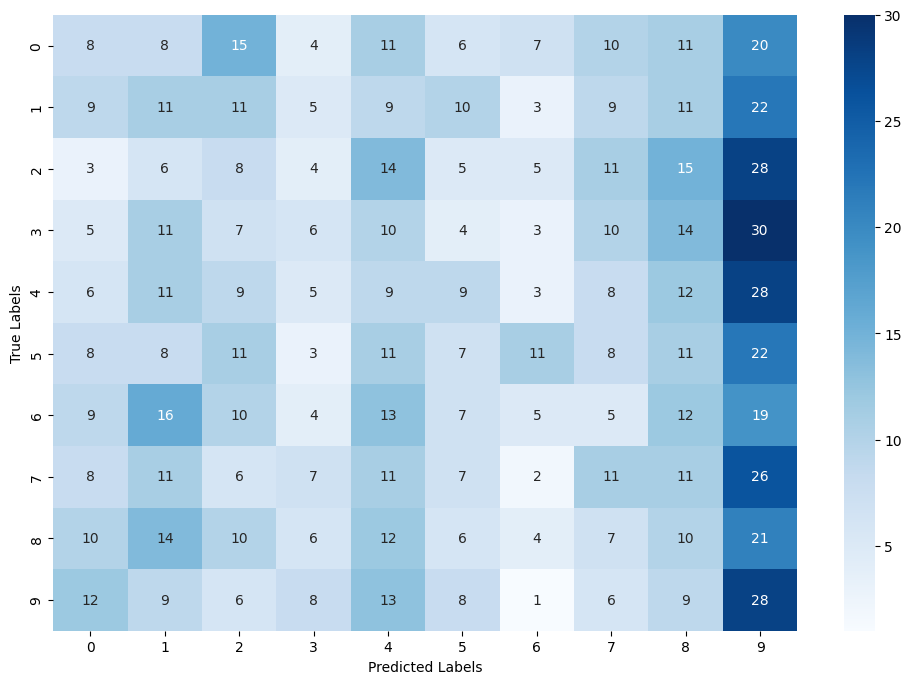

In [9]:
# Evaluate VGG model
vgg_val_loss, vgg_val_acc = vgg_model.evaluate(val_generator)
print(f"Validation Accuracy for VGG Model: {vgg_val_acc}")

# Confusion matrix for CNN model predictions
cnn_predictions = cnn_model.predict(val_generator)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)
true_classes = val_generator.classes

conf_matrix = confusion_matrix(true_classes, cnn_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Prediction on unseen images

In [10]:
import os
from tensorflow.keras.models import load_model

# Define model path
model_path = "/kaggle/working/tomato_disease_vgg_model.h5"

# Save model only if it hasn't been saved before
if not os.path.exists(model_path):
    vgg_model.save(model_path)
    print(f"Model saved to: {model_path}")
else:
    print(f"Model already exists at: {model_path}")

# Load the saved model for predictions on new data
saved_model = load_model(model_path)

# Function to predict on new images
def predict_image(img_path, actual_label, model):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    
    # Print both actual and predicted class
    print(f"Actual class: {actual_label}")
    print(f"Predicted class: {labels[predicted_class]}")
    return labels[predicted_class]

# Example prediction with actual label
sample_image_path = '/kaggle/input/unseen-images/new tomato images/1-29.png'  # Replace with actual path
actual_label = 'Tomato___Early_blight'  # Replace with actual class label
predicted_label = predict_image(sample_image_path, actual_label, saved_model)


Model saved to: /kaggle/working/tomato_disease_vgg_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual class: Tomato___Early_blight
Predicted class: Tomato___Septoria_leaf_spot


Found 9998 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Training Custom CNN model...
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.3963 - loss: 1.7032 - val_accuracy: 0.7588 - val_loss: 0.7291
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7247 - loss: 0.7897 - val_accuracy: 0.7497 - val_loss: 0.8102
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.7870 - loss: 0.6158 - val_accuracy: 0.8338 - val_loss: 0.5161
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.8250 - loss: 0.4934 - val_accuracy: 0.8058 - val_loss: 0.6263
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8633 - loss: 0.3831 - val_accuracy: 0.8318 - val_loss: 0.5594
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.8787 - loss: 0.3473 - val_accuracy: 0.8719 - val_loss: 0.4468
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9053 - loss: 0.2806 - val_accuracy: 0.8539 - val_loss: 0.4622
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9121 - loss: 0.2627 - val_accurac

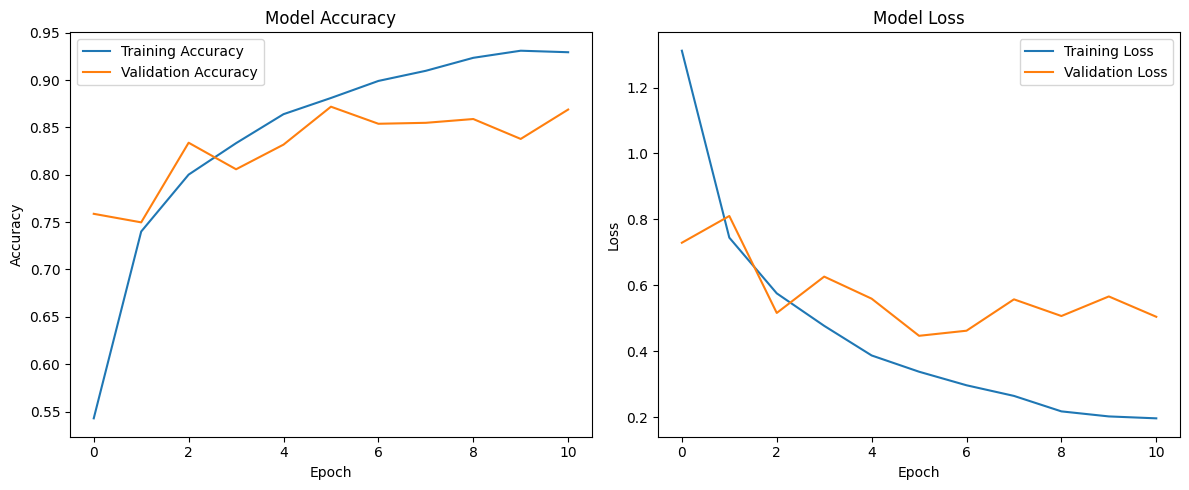

Custom CNN model saved to: /kaggle/working/tomato_disease_custom_cnn.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Actual label: Tomato___Early_blight
Predicted label: Tomato___Early_blight


In [11]:
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Define directories for training and validation data
train_dir = '/kaggle/input/tomato-leafdisease/tomato/train'  # Replace with actual path
val_dir = '/kaggle/input/tomato-leafdisease/tomato/val'      # Replace with actual path

# Initialize ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

input_shape = (224, 224, 3)  # Input shape for models
num_classes = train_generator.num_classes  # Number of classes

# 1. Custom CNN Model
def create_custom_cnn():
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model



# Instantiate models
custom_cnn = create_custom_cnn()


# Early stopping for faster training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Custom CNN model and capture the history
print("Training Custom CNN model...")
custom_cnn_history = custom_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate on validation data
custom_cnn_val_loss, custom_cnn_val_acc = custom_cnn.evaluate(val_generator)
print(f"Custom CNN Model - Validation Loss: {custom_cnn_val_loss}, Validation Accuracy: {custom_cnn_val_acc}")


# Plotting the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(custom_cnn_history)


# Save models
custom_cnn_path = "/kaggle/working/tomato_disease_custom_cnn.h5"


if not os.path.exists(custom_cnn_path):
    custom_cnn.save(custom_cnn_path)
    print(f"Custom CNN model saved to: {custom_cnn_path}")
else:
    print(f"Custom CNN model already exists at: {custom_cnn_path}")


# Prediction function for new images
def predict_image(img_path, actual_label, model):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading image at path: {img_path}")
        return None
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    predictions = model.predict(img)
    class_label = np.argmax(predictions)  # Get the index of the highest prediction score
    predicted_class = list(train_generator.class_indices.keys())[class_label]  # Map index to class name
    
    print(f"Actual label: {actual_label}")
    print(f"Predicted label: {predicted_class}")
    return predicted_class

# Example prediction
sample_image_path = '/kaggle/input/unseen-images/new tomato images/1-29.png'  # Replace with actual path
actual_label = 'Tomato___Early_blight'  # Replace with actual class label
predicted_label = predict_image(sample_image_path, actual_label, custom_cnn)



Found 9998 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training ResNet50 model...
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 392ms/step - accuracy: 0.0982 - loss: 2.4519 - val_accuracy: 0.1001 - val_loss: 2.3026 - learning_rate: 1.0000e-04
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 362ms/step - accuracy: 0.0960 - loss: 2.3027 - val_accuracy: 0.1001 - val_loss: 2.3026 - learning_rate: 1.0000e-04
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 118s 367ms/step - accuracy: 0.1010 - loss: 2.3026 - val_accuracy: 0.1001 - val_loss: 2.3026 - learning_rate: 1.0000e-04
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.0930 - loss: 2.3026
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
313/313 ━━━━━━━━━━━━━━━━━━━━ 116s 364ms/step - accuracy: 0.0930 - loss: 2.3026 - val_accuracy: 0.1001 - val_loss: 2.3026 - learning_rate: 1.0000e-04
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s

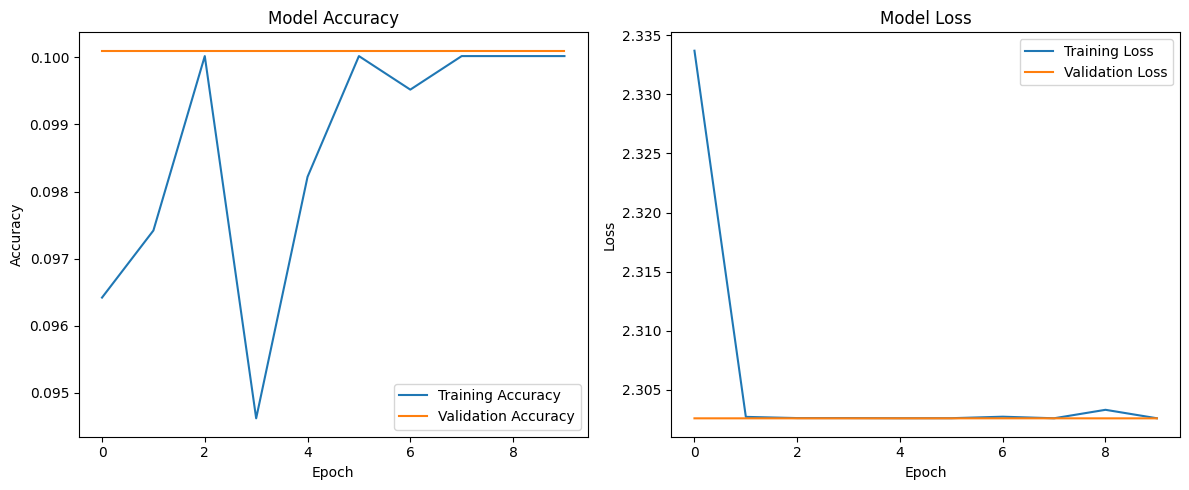

ResNet50 model saved to: /kaggle/working/tomato_disease_resnet50.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Actual label: Tomato___Early_blight
Predicted label: Tomato___healthy


In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Define directories for training and validation data
train_dir = '/kaggle/input/tomato-leafdisease/tomato/train'  # Replace with actual path
val_dir = '/kaggle/input/tomato-leafdisease/tomato/val'      # Replace with actual path

# Initialize ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

input_shape = (224, 224, 3)  # Input shape for models
num_classes = train_generator.num_classes  # Number of classes

# 2. ResNet50 Model
def create_resnet50_model():
    # Load the ResNet50 model without the top (classifier) layers
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Unfreeze some of the top layers for fine-tuning
    for layer in base_model.layers[:-10]:  # Unfreeze the last 10 layers
        layer.trainable = False

    # Create the final model on top of ResNet50
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Instantiate the ResNet50 model
resnet50_model = create_resnet50_model()

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the ResNet50 model and capture the history
print("Training ResNet50 model...")
resnet50_history = resnet50_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Increased epochs
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate on validation data
resnet50_val_loss, resnet50_val_acc = resnet50_model.evaluate(val_generator)
print(f"ResNet50 Model - Validation Loss: {resnet50_val_loss}, Validation Accuracy: {resnet50_val_acc}")

# Plotting the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(resnet50_history)

# Save models
resnet50_model_path = "/kaggle/working/tomato_disease_resnet50.h5"

if not os.path.exists(resnet50_model_path):
    resnet50_model.save(resnet50_model_path)
    print(f"ResNet50 model saved to: {resnet50_model_path}")
else:
    print(f"ResNet50 model already exists at: {resnet50_model_path}")

# Prediction function for new images
def predict_image(img_path, actual_label, model):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading image at path: {img_path}")
        return None
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    predictions = model.predict(img)
    class_label = np.argmax(predictions)  # Get the index of the highest prediction score
    predicted_class = list(train_generator.class_indices.keys())[class_label]  # Map index to class name
    
    print(f"Actual label: {actual_label}")
    print(f"Predicted label: {predicted_class}")
    return predicted_class

# Example prediction
sample_image_path = '/kaggle/input/unseen-images/new tomato images/1-29.png'  # Replace with actual path
actual_label = 'Tomato___Early_blight'  # Replace with actual class label
predicted_label = predict_image(sample_image_path, actual_label, resnet50_model)
